### Name:       Ghulam Mustafa
### Roll:       FA22-BSCS-188
### Section:    E
____________________________________
# ASSIGNMENT:  DATA PRE-PROCESSING
# AI LAB

____________

## SPAM DETECTION DATASET PRE PROCESSING

____________

        Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

        Import Data

In [2]:
data = pd.read_csv('spam_detection_dataset.csv')
data.head()

,num_links,num_words,has_offer,sender_score,all_caps,is_spam
0,3,98,1,0.718607,0,0
1,0,170,0,0.698901,1,0
2,0,38,0,0.620466,0,0
3,0,116,0,0.701755,0,0
4,3,89,1,0.583621,1,1


In [3]:
data.shape

(20000, 6)

## HANDLING MISSING VALUES

Fill numeric columns with median and mode

In [4]:

data['num_links'] = data['num_links'].fillna(data['num_links'].median())
data['num_words'] = data['num_words'].fillna(data['num_words'].median())
data['sender_score'] = data['sender_score'].fillna(data['sender_score'].median())
data['has_offer'] = data['has_offer'].fillna(data['has_offer'].mode()[0])
data['all_caps'] = data['all_caps'].fillna(data['all_caps'].mode()[0])
data['is_spam'] = data['is_spam'].fillna(data['is_spam'].mode()[0])

________

### Drop Duplicate Values

In [6]:
data.drop_duplicates(inplace=True)

_______________

###     Note:
-       No need of converting any data to other formats as all columns have numeric data already
-       No need of any derived column as well


In [8]:
data.head()

,num_links,num_words,has_offer,sender_score,all_caps,is_spam
0,3,98,1,0.718607,0,0
1,0,170,0,0.698901,1,0
2,0,38,0,0.620466,0,0
3,0,116,0,0.701755,0,0
4,3,89,1,0.583621,1,1


______________

## Train-Test Split

In [7]:
X = data.drop('is_spam', axis=1)
y = data['is_spam']

In [10]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [11]:
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)
print("X_test Shape:", X_test.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (13718, 5)
y_train Shape: (13718,)
X_test Shape: (5880, 5)
y_test Shape: (5880,)


___________________________

## PLOTTING GRAPHS

_____________

        Imports

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

### Histogram of Sender Score

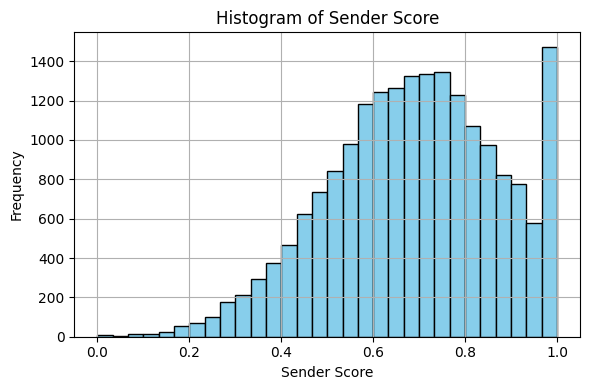

In [13]:

plt.figure(figsize=(6,4))
plt.hist(data['sender_score'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Sender Score')
plt.xlabel('Sender Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

### Line Plot of Number of Links

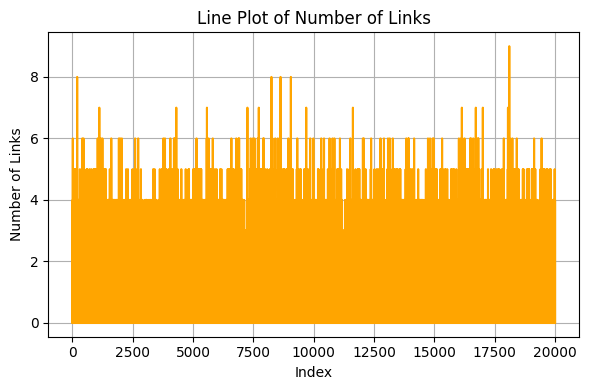

In [14]:
plt.figure(figsize=(6,4))
plt.plot(data['num_links'], color='orange')
plt.title('Line Plot of Number of Links')
plt.xlabel('Index')
plt.ylabel('Number of Links')
plt.grid(True)
plt.tight_layout()
plt.show()


### Box Plot of Num Words by Spam Status

/tmp/ipykernel_20812/2384765345.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_spam', y='num_words', data=data, palette='Set2')


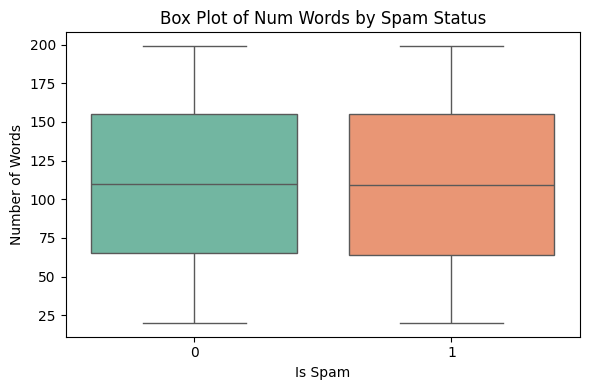

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x='is_spam', y='num_words', data=data, palette='Set2')
plt.title('Box Plot of Num Words by Spam Status')
plt.xlabel('Is Spam')
plt.ylabel('Number of Words')
plt.tight_layout()
plt.show()


### Scatter Plot: snder score vs Num-Words

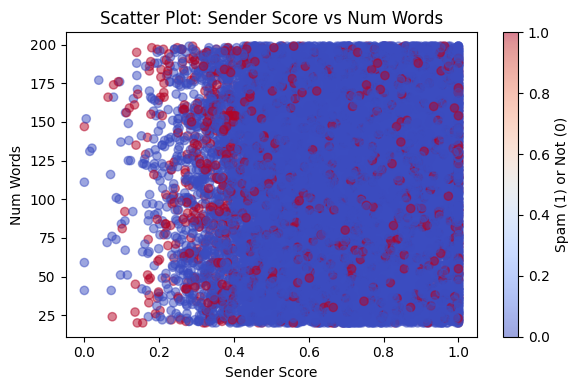

In [16]:
plt.figure(figsize=(6,4))
plt.scatter(data['sender_score'], data['num_words'], alpha=0.5, c=data['is_spam'], cmap='coolwarm')
plt.title('Scatter Plot: Sender Score vs Num Words')
plt.xlabel('Sender Score')
plt.ylabel('Num Words')
plt.colorbar(label='Spam (1) or Not (0)')
plt.tight_layout()
plt.show()


### Bar Plot spam vs not spam if has offer

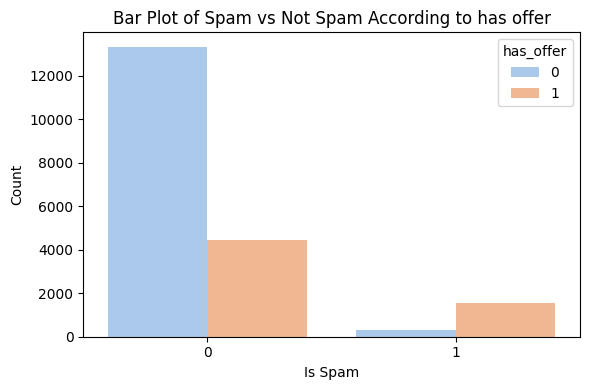

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='is_spam', data=data, palette='pastel', hue='has_offer')
plt.title('Bar Plot of Spam vs Not Spam According to has offer')
plt.xlabel('Is Spam')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Correlation Heatmap

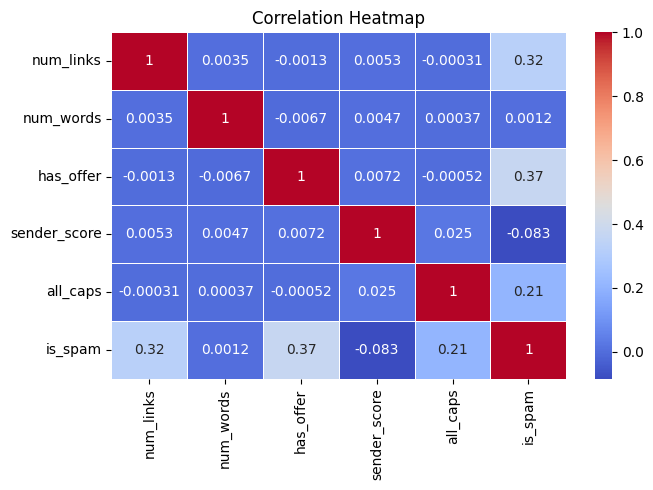

In [22]:
plt.figure(figsize=(7,5))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
